In [1]:
import os
from os.path import exists

import requests  
from bs4 import BeautifulSoup 

## 웹 사이트 순위 : Alexa - Top Sites in South Korea

In [3]:
url = "https://www.alexa.com/topsites/countries/KR"
html = requests.get(url).text
soup = BeautifulSoup(html, 'lxml')
soup.title
# 타이틀 정보가 나옴

<title>Alexa - Top Sites in South Korea - Alexa</title>

In [7]:
soup.title

<title>Alexa - Top Sites in South Korea - Alexa</title>

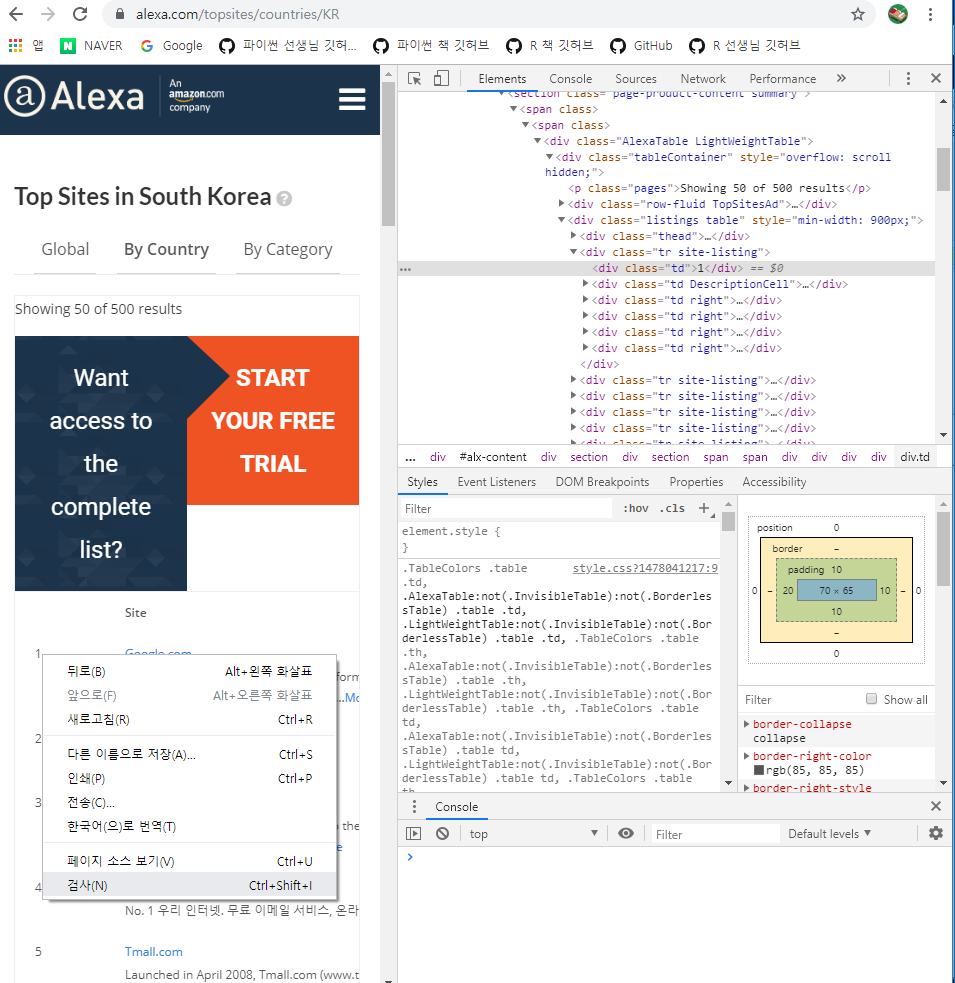

In [39]:
# 이러면 50개까지의 순위
top_sites = soup.find_all('div', 'tr site-listing')
len(top_sites)

0

In [24]:
tmp = top_sites[0]
tmp # 이러면 1위 자료 다 나옴

<div class="tr site-listing">
<div class="td">1</div>
<div class="td DescriptionCell">
<p class="">
<a href="/siteinfo/google.com">Google.com</a>
</p>
<div class="description">
                      Enables users to search the world's information, including webpages, images, and videos. Offers<span class="trucate">…<a class="moreDesc">More</a></span><span class="remainder"> unique features and search technology.
                          <span class="trucate"> <a class="lessDesc">Less</a></span>
</span>
</div>
</div>
<div class="td right"><p>8:52</p></div>
<div class="td right"><p>12.74</p></div>
<div class="td right"><p>0.50%</p></div>
<div class="td right"><p>2,163,333</p></div>
</div>

In [40]:
# 이러면 순위값을 가지고 있는 태그가 다 나옴
tmp1 = tmp.find('div', 'td'); tmp1

<div class="td">1</div>

In [45]:
# tmp1에서 rank값만 추출
rank = tmp1.get_text(); rank

'1'

In [44]:
# 사이트명이 나옴
tmp2 = tmp.find('a'); tmp2

<a href="/siteinfo/google.com">Google.com</a>

In [47]:
# tmp2에서 text값인 site값만 추출
site = tmp2.get_text(); site

'Google.com'

In [53]:
# href에 있는 값 추출
link = tmp2['href']; link

'/siteinfo/google.com'

In [54]:
Rank = []
Site = []
Link = []

url = "https://www.alexa.com/topsites/countries/KR"

html = requests.get(url).text
soup = BeautifulSoup(html, "lxml")
top_sites = soup.find_all('div', 'tr site-listing')

print("[Top Sites in South Korea]")
print("="*80)
for idx in range(len(top_sites)):
    tmp  = top_sites[idx]
    
    tmp1 = tmp.find('div', 'td')
    tmp2 = tmp.find('a')
    rank = tmp1.get_text()
    site = tmp2.get_text()
    link = tmp2['href']
    link = 'https://www.alexa.com' + link
    
    if idx%10==0 and idx>0:
        print("-"*80)
        
    print("{rank}위. {site} {link}".format(
        rank = ' '*(3-len(rank)) + rank, 
        site = site, 
        link = ' '*(20-len(site)) + link
    ))
    
    Rank.append(rank)
    Site.append(site)
    Link.append(link)

[Top Sites in South Korea]
  1위. Google.com           https://www.alexa.com/siteinfo/google.com
  2위. Naver.com            https://www.alexa.com/siteinfo/naver.com
  3위. Youtube.com          https://www.alexa.com/siteinfo/youtube.com
  4위. Daum.net             https://www.alexa.com/siteinfo/daum.net
  5위. Tmall.com            https://www.alexa.com/siteinfo/tmall.com
  6위. Google.co.kr         https://www.alexa.com/siteinfo/google.co.kr
  7위. Tistory.com          https://www.alexa.com/siteinfo/tistory.com
  8위. Sohu.com             https://www.alexa.com/siteinfo/sohu.com
  9위. Qq.com               https://www.alexa.com/siteinfo/qq.com
 10위. Login.tmall.com      https://www.alexa.com/siteinfo/login.tmall.com
--------------------------------------------------------------------------------
 11위. Wikipedia.org        https://www.alexa.com/siteinfo/wikipedia.org
 12위. Taobao.com           https://www.alexa.com/siteinfo/taobao.com
 13위. Facebook.com         https://www.alexa.com/siteinfo/face

In [55]:
Rank[:5]

['1', '2', '3', '4', '5']

In [56]:
Site[:5]

['Google.com', 'Naver.com', 'Youtube.com', 'Daum.net', 'Tmall.com']

In [57]:
Link[:5]

['https://www.alexa.com/siteinfo/google.com',
 'https://www.alexa.com/siteinfo/naver.com',
 'https://www.alexa.com/siteinfo/youtube.com',
 'https://www.alexa.com/siteinfo/daum.net',
 'https://www.alexa.com/siteinfo/tmall.com']

In [58]:
import pandas as pd
data = {'Rank' : Rank, 'Site' : Site, 'Link' : Link}
df = pd.DataFrame(data)

In [59]:
df.head()

,Rank,Site,Link
0,1,Google.com,https://www.alexa.com/siteinfo/google.com
1,2,Naver.com,https://www.alexa.com/siteinfo/naver.com
2,3,Youtube.com,https://www.alexa.com/siteinfo/youtube.com
3,4,Daum.net,https://www.alexa.com/siteinfo/daum.net
4,5,Tmall.com,https://www.alexa.com/siteinfo/tmall.com


In [60]:
df.set_index('Rank', inplace=True)
df.head()

,Site,Link
Rank,,
1,Google.com,https://www.alexa.com/siteinfo/google.com
2,Naver.com,https://www.alexa.com/siteinfo/naver.com
3,Youtube.com,https://www.alexa.com/siteinfo/youtube.com
4,Daum.net,https://www.alexa.com/siteinfo/daum.net
5,Tmall.com,https://www.alexa.com/siteinfo/tmall.com


In [61]:
dir_data = 'data'
if not exists(dir_data):
    os.mkdir(dir_data)

In [62]:
df.to_csv('./data/top_sites_SKorea_201909.csv')

In [63]:
!type .\data\top_sites_SKorea_201909.csv

Rank,Site,Link
1,Google.com,https://www.alexa.com/siteinfo/google.com
2,Naver.com,https://www.alexa.com/siteinfo/naver.com
3,Youtube.com,https://www.alexa.com/siteinfo/youtube.com
4,Daum.net,https://www.alexa.com/siteinfo/daum.net
5,Tmall.com,https://www.alexa.com/siteinfo/tmall.com
6,Google.co.kr,https://www.alexa.com/siteinfo/google.co.kr
7,Tistory.com,https://www.alexa.com/siteinfo/tistory.com
8,Sohu.com,https://www.alexa.com/siteinfo/sohu.com
9,Qq.com,https://www.alexa.com/siteinfo/qq.com
10,Login.tmall.com,https://www.alexa.com/siteinfo/login.tmall.com
11,Wikipedia.org,https://www.alexa.com/siteinfo/wikipedia.org
12,Taobao.com,https://www.alexa.com/siteinfo/taobao.com
13,Facebook.com,https://www.alexa.com/siteinfo/facebook.com
14,Amazon.com,https://www.alexa.com/siteinfo/amazon.com
15,Jd.com,https://www.alexa.com/siteinfo/jd.com
16,Namu.wiki,https://www.alexa.com/siteinfo/namu.wiki
17,360.cn,https://www.alexa.com/siteinfo/360.cn
18,Kakao.com,https://www.alexa.com/siteinfo/kakao.co